# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [3]:
library(tidyverse)
library(Rtsne)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [4]:
# a)
wine <- read.csv("wine.csv", header = TRUE, stringsAsFactors = FALSE)
head(wine)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [5]:
# b)
colnames(wine)
summary(wine)
str(wine)

[1] "Alcohol"                       "Malicacid"                    
 [3] "Ash"                           "Alcalinity_of_ash"            
 [5] "Magnesium"                     "Total_phenols"                
 [7] "Flavanoids"                    "Nonflavanoid_phenols"         
 [9] "Proanthocyanins"               "Color_intensity"              
[11] "Hue"                           "X0D280_0D315_of_diluted_wines"
[13] "Proline"                       "class"

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

'data.frame':	178 obs. of  14 variables:
 $ Alcohol                      : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malicacid                    : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                          : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity_of_ash            : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                    : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total_phenols                : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_phenols         : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins              : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_intensity              : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                          : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 

In [6]:
# c)
summary(wine)
numeric_cols <- sapply(wine, is.numeric)
summary(wine[, numeric_cols])

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [7]:
# a)
library(dplyr)
wine_scaled <- wine %>%
mutate(across(-class, ~ as.numeric(scale(.))))
head(wine_scaled)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1
2,0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1
3,0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1
4,1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1
5,0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1
6,1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1


**b)**
Scaling and centering are useful before running PCA because the variables in this dataset are on very different scales. For instance, Proline can be over one thousand, while *Nonflavanoid_phenols* is usually less than 1. Without scaling, the variables with larger ranges would dominate the principal components, and the smaller-scale variables would have little influence. By standardizing, all variables are put on the same footing, so PCA can reflect the overall relationships in the data rather than just the effect of a few large-valued variables.

## Question 3

#### a) Perform PCA

In [8]:
wine_pca <- prcomp(wine_scaled[, -14], 
                   center = FALSE,       
                   scale. = FALSE)
summary(wine_pca)
head(wine_pca$rotation)
head(wine_pca$x)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.48365155,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.22493093,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.31606881,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.01059050,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.29963400,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.06503951,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
-3.307421,-1.4394023,-0.1652728,-0.2150246,-0.6910933,-0.2232504,0.59474883,0.06495586,-0.63963836,-1.01808396,0.4502932,-0.5392891439,0.066052305
-2.203250,0.3324551,-2.0207571,-0.2905387,0.2569299,-0.9245123,0.05362434,1.02153432,0.30797798,-0.15925214,0.1422560,-0.3871456499,-0.003626273
-2.509661,-1.0282507,0.9800541,0.7228632,0.2503270,0.5477310,0.42301218,-0.34324787,1.17452129,-0.11304198,0.2858665,-0.0005819316,-0.021655423
-3.746497,-2.7486184,-0.1756962,0.5663856,0.3109644,0.1141091,-0.38225899,0.64178311,-0.05239662,-0.23873915,-0.7574476,0.2413387757,0.368444194
-1.006070,-0.8673840,2.0209873,-0.4086131,-0.2976180,-0.4053761,0.44282531,0.41552831,-0.32589984,0.07814604,0.5244656,0.2160546934,0.079140320
-3.041674,-2.1164309,-0.6276254,-0.5141870,0.6302409,0.1230834,0.40052393,0.39378261,0.15171810,0.10170891,-0.4044444,0.3783653606,-0.144747017


#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

**From the PCA results, PC1 explains about _36.2%_ of the total variance, and PC2 explains about _19.2%_. Together, the first two principal components explain roughly _55.4%_ of the variance in the dataset. And we use the function: _summary(wine_pca)_**

#### c) Why are we doing PCA first?

**We are doing PCA first because the dataset has many correlated variables. PCA reduces the dimensionality by creating new uncorrelated components that capture most of the variance in the data. It actually helps simplify the dataset. It also prevents certain variables from dominating simply because they are on larger scales or are highly correlated with others.**

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

**The rotation matrix shows the loadings of each variable on each principal component. We can print it directly with:_wine_pca$rotation_**

In [14]:
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


**This table is the rotation matrix, where each number shows how strongly a variable contributes to a principal component.**

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

In [9]:
install.packages("dplyr")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



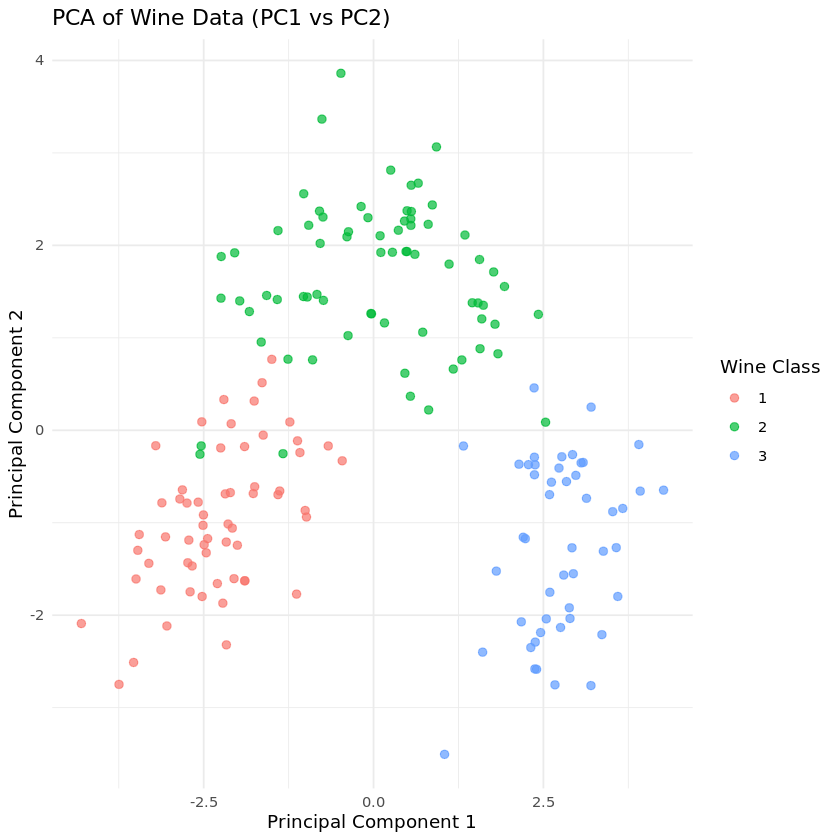

In [10]:
library(ggplot2)
library(dplyr)
# Create a data frame
pca_data <- as.data.frame(wine_pca$x[, 1:2]) %>%
mutate(class = wine_scaled$class)
# Plot PC1, PC2, colored by wine class
ggplot(pca_data, aes(x = PC1, y = PC2, color = factor(class))) +
geom_point(size = 2, alpha = 0.7) +
labs(title = "PCA of Wine Data (PC1 vs PC2)",
     x = "Principal Component 1",
     y = "Principal Component 2",
     color = "Wine Class") +
theme_minimal()

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

**From the PC1 vs PC2 plot, we see three clear clusters. Class 1 with red dots is on the left, Class 2 with green dots is in the middle and upper region, and Class 3 with blue dots is on the right. The groups are mostly well separated, with only a little overlap between Class 1 and Class 2. This means the first two principal components already capture most of the differences between wine classes, showing that the classes are strongly related to chemical composition.**

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

**PCA fails when the important structure in the data is non-linear and cannot be captured by a linear projection. For example, if the data are arranged in a curved shape like a _two-dimensional_ spiral or a _Swiss roll_, PCA will flatten the data in a way that loses the meaningful pattern. In such cases, methods like _t-SNE_ or _kernel PCA_ are more appropriate because they can capture non-linear structures.**

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.

**Vector space is flat and defined by linear coordinates, where any point can be expressed as a linear combination of basis vectors. PCA works in a vector space because it assumes linear structure.
Manifold is a curved space that locally looks like a vector space but globally may have a more complex, non-linear structure.**


**In the context of dimensionality reduction, PCA finds structure in a linear vector space, but it cannot capture curved manifolds. Methods like t-SNE are designed to uncover the underlying manifold structure by preserving local neighborhood relationships, which helps us visualize non-linear patterns in the data.**

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

In [11]:
install.packages("Rtsne")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [12]:
library(dplyr)
library(Rtsne)  
set.seed(123)

# Subset PCA results to PC1–PC10
pca_10 <- as.data.frame(wine_pca$x[, 1:10]) %>%
mutate(class = wine_scaled$class)
#  Remove duplicates
pca_10_nodup <- distinct(pca_10)

# Run t-SNE on PC1–PC10 
tsne_out <- Rtsne(pca_10_nodup[, 1:10], dims = 2, perplexity = 30, verbose = TRUE)

tsne_data <- as.data.frame(tsne_out$Y) %>%
mutate(class = pca_10_nodup$class)

head(tsne_data)

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.396099 (50 iterations in 0.01 seconds)
Iteration 100: error is 51.127538 (50 iterations in 0.01 seconds)
Iteration 150: error is 50.598560 (50 iterations in 0.01 seconds)
Iteration 200: error is 50.140847 (50 iterations in 0.01 seconds)
Iteration 250: error is 50.024571 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.632583 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.376300 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.367101 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.366323 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.364658 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.369730 (50 iterations in 0.01 seconds)
Iteration 600

,V1,V2,class
,<dbl>,<dbl>,<int>
1,-7.270259,-7.534594,1
2,-5.285213,-4.805297,1
3,-10.087365,-4.488427,1
4,-9.169783,-6.964172,1
5,-8.835475,-1.001065,1
6,-9.555461,-6.200165,1


#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

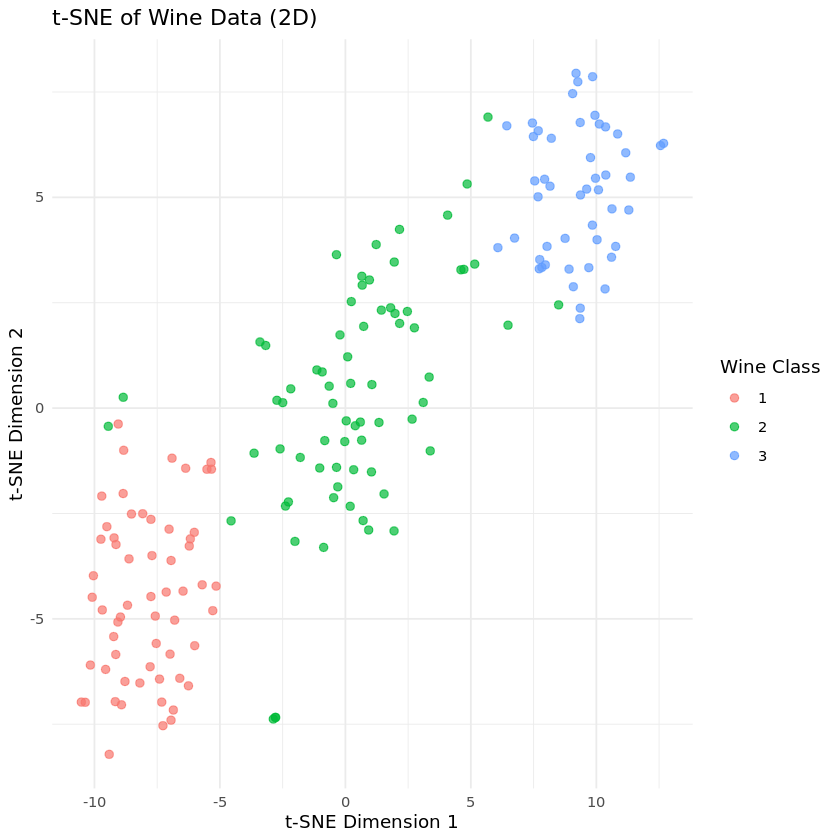

In [13]:
# Convert to tibble
tsne_tibble <- as_tibble(tsne_data)
# Plot t-SNE results
ggplot(tsne_tibble, aes(x = V1, y = V2, color = factor(class))) +
geom_point(size = 2, alpha = 0.7) +
labs(title = "t-SNE of Wine Data (2D)",
     x = "t-SNE Dimension 1",
     y = "t-SNE Dimension 2",
     color = "Wine Class") +
theme_minimal()

#### c) Why didn't we stop at PCA?

**We didn’t stop at PCA because it only finds linear patterns. t-SNE goes further by preserving local relationships and capturing possible non-linear structure, which gives a clearer view of how the wine classes separate.**

#### d) What other types of data does this workflow make sense for?

**This workflow is useful for many kinds of high-dimensional data, such as gene expression profiles in biology, image data with thousands of pixel features, audio data represented by spectrograms, text data using word embeddings, or customer behavior data in marketing. In all these cases, PCA helps reduce noise and dimensions, and t-SNE can uncover non-linear patterns and show clusters more clearly.**